In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("EJERCICIO 2: CLASIFICACIÓN - PREDICCIÓN DE DIABETES")

EJERCICIO 2: CLASIFICACIÓN - PREDICCIÓN DE DIABETES


In [35]:
print("\n 1 Cargando dataset...")
df = pd.read_csv(r"C:\Users\yanny\Downloads\diabetes.csv")

print(f" Dataset cargado exitosamente")
print(f"  - Filas: {df.shape[0]}")
print(f"  - Columnas: {df.shape[1]}")


 1 Cargando dataset...
 Dataset cargado exitosamente
  - Filas: 768
  - Columnas: 9


In [36]:
print("\n 2 Exploración inicial de datos")
print("\nPrimeras 5 filas:")
display(df.head())

print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nDistribución de la variable objetivo (Outcome):")
print(df['Outcome'].value_counts())
print("\nPorcentaje de cada clase:")
display(df['Outcome'].value_counts(normalize=True) * 100)


 2 Exploración inicial de datos

Primeras 5 filas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Estadísticas descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribución de la variable objetivo (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Porcentaje de cada clase:


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


 3 Análisis Exploratorio de Datos (EDA)


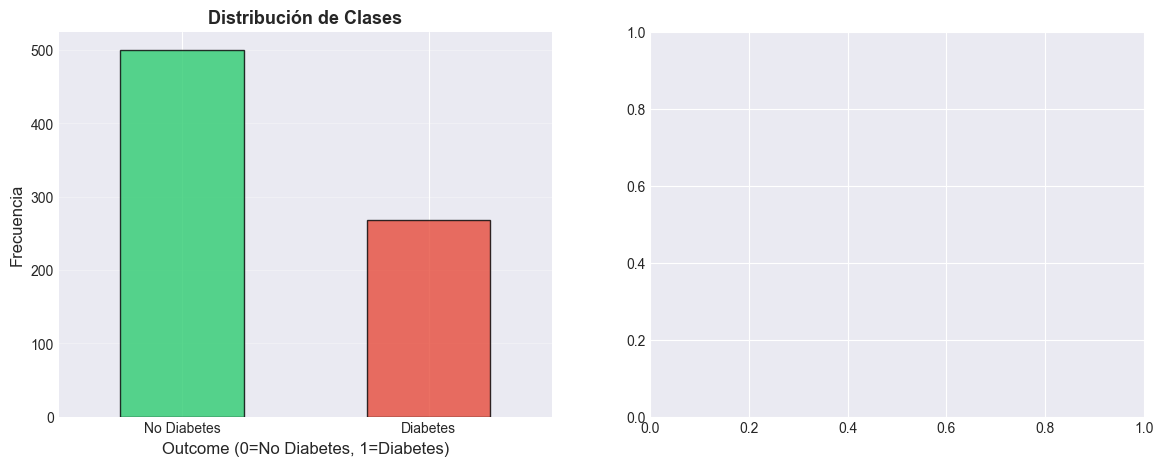

In [37]:
# 4. ANÁLISIS EXPLORATORIO
print("\n 3 Análisis Exploratorio de Datos (EDA)")

# Distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df['Outcome'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], 
                                   edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Clases', fontsize=13, fontweight='bold')
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

In [38]:
# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c']
df['Outcome'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                   colors=colors, startangle=90, 
                                   labels=['No Diabetes', 'Diabetes'])
axes[1].set_ylabel('')
axes[1].set_title('Proporción de Clases', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

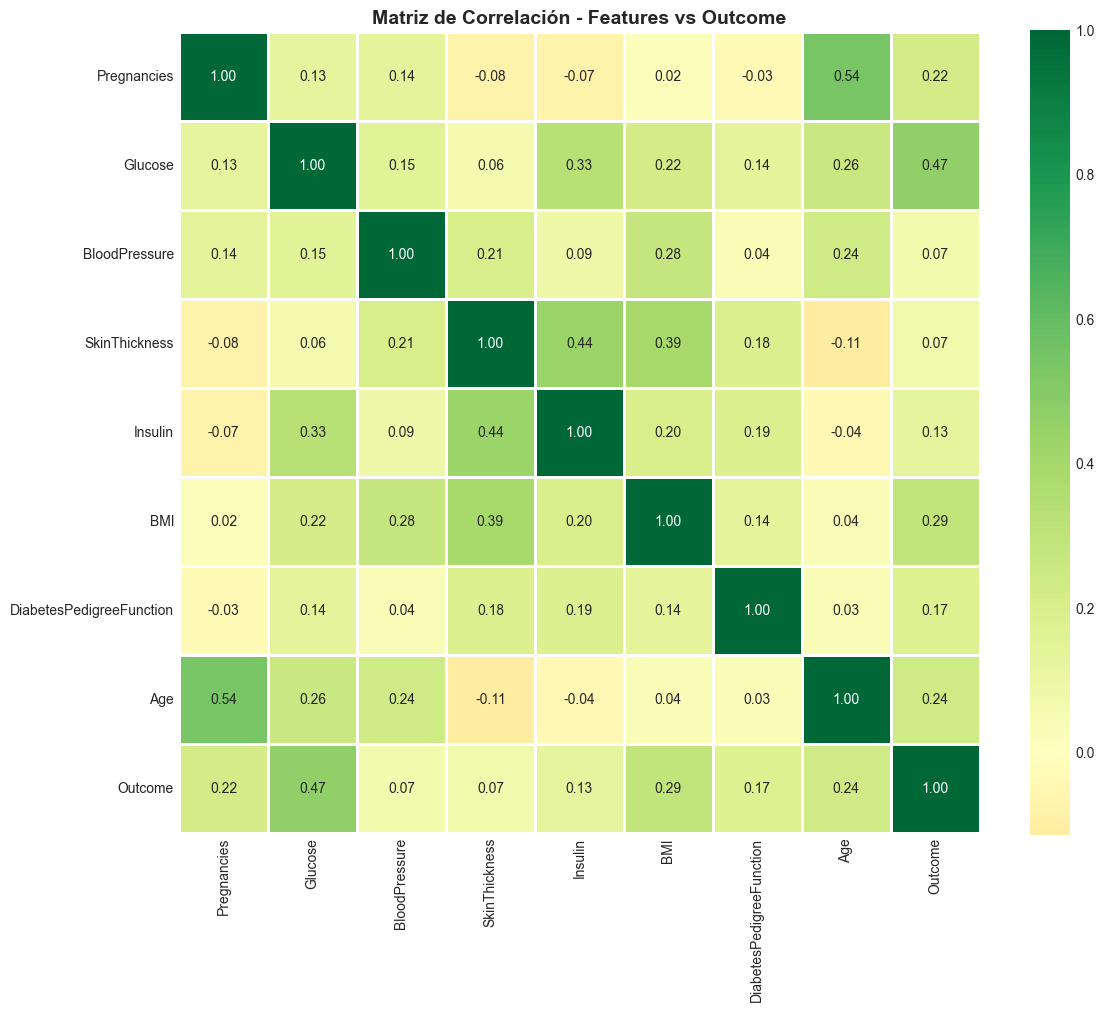


Correlación de features con Outcome:


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [39]:
# Correlación entre variables
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', 
            square=True, linewidths=1, center=0)
plt.title('Matriz de Correlación - Features vs Outcome', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelación de features con Outcome:")
display(df.corr()['Outcome'].sort_values(ascending=False))

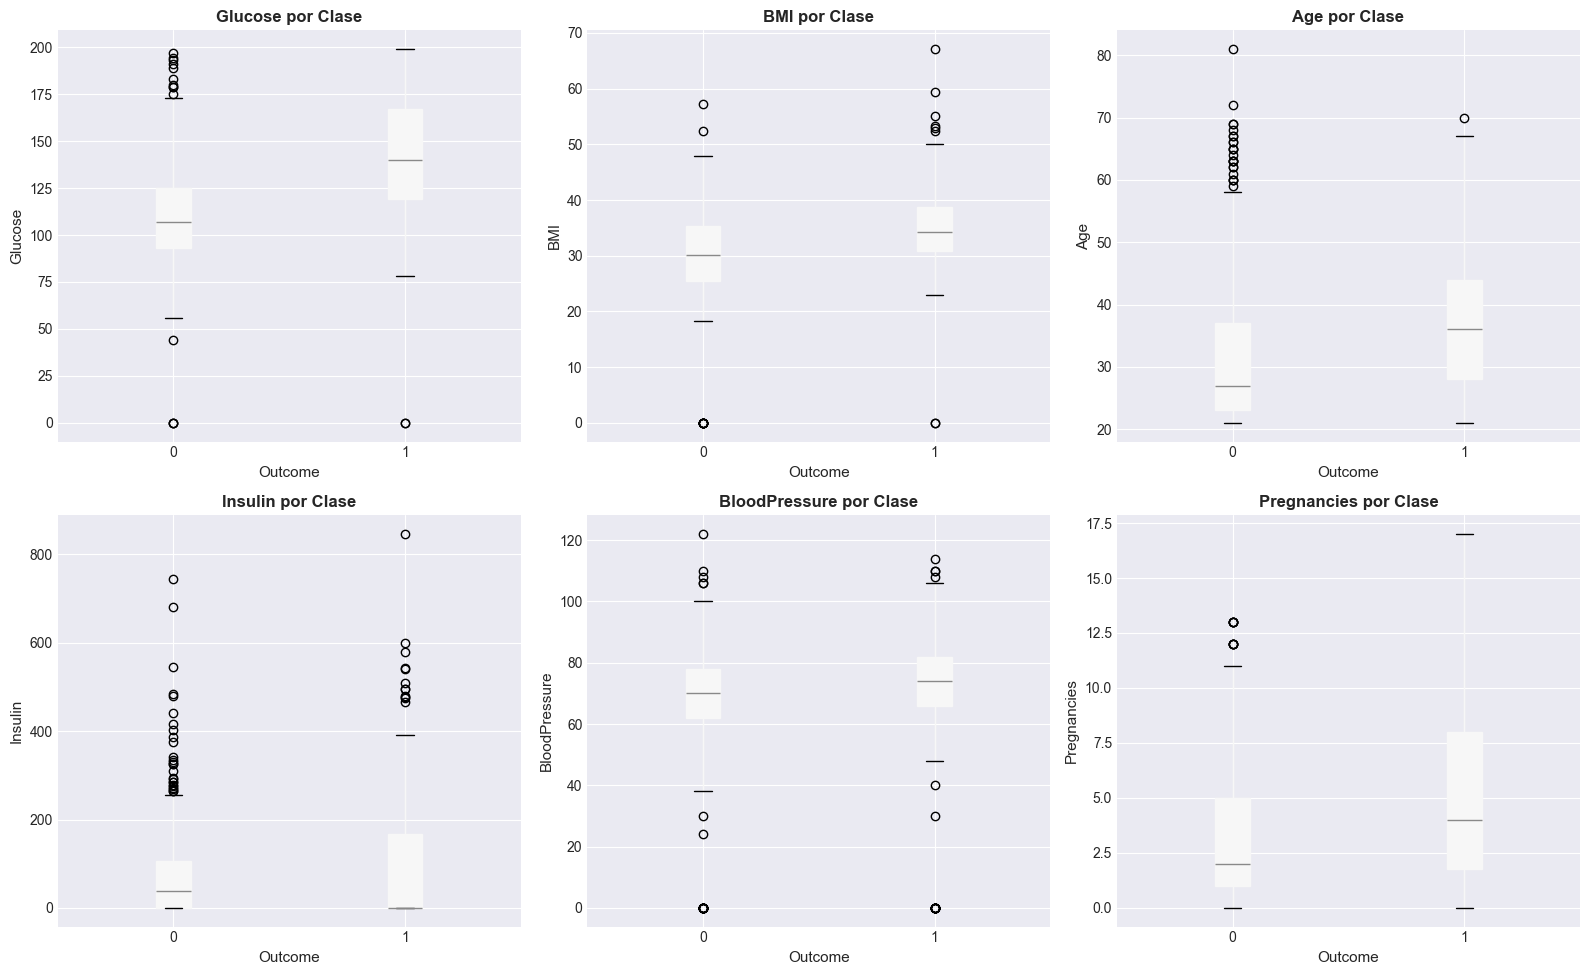

In [40]:
# Distribución de features por clase
features_numericas = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_numericas):
    df.boxplot(column=feature, by='Outcome', ax=axes[idx], patch_artist=True)
    axes[idx].set_xlabel('Outcome', fontsize=11)
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].set_title(f'{feature} por Clase', fontsize=12, fontweight='bold')
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.show()

In [41]:
print("\n 4 Preparación de datos")

# Manejar valores ceros que son biológicamente imposibles
columnas_con_ceros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\nValores ceros encontrados:")
for col in columnas_con_ceros:
    ceros = (df[col] == 0).sum()
    print(f"  {col}: {ceros} valores cero")


 4 Preparación de datos

Valores ceros encontrados:
  Glucose: 5 valores cero
  BloodPressure: 35 valores cero
  SkinThickness: 227 valores cero
  Insulin: 374 valores cero
  BMI: 11 valores cero


In [42]:
# Reemplazar ceros por la mediana
df_clean = df.copy()
for col in columnas_con_ceros:
    df_clean[col] = df_clean[col].replace(0, df_clean[df_clean[col] != 0][col].median())

print("\n Valores ceros reemplazados por la mediana")


 Valores ceros reemplazados por la mediana


In [43]:
# Separar features y target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

print(f"\nFeatures utilizadas: {list(X.columns)}")
print(f"Variable objetivo: Outcome (0=No Diabetes, 1=Diabetes)")


Features utilizadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Variable objetivo: Outcome (0=No Diabetes, 1=Diabetes)


In [44]:
# División train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"✓ Datos de prueba: {X_test.shape[0]} muestras")

print(f"\nDistribución en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución en prueba:")
print(y_test.value_counts())


✓ Datos de entrenamiento: 614 muestras
✓ Datos de prueba: 154 muestras

Distribución en entrenamiento:
Outcome
0    400
1    214
Name: count, dtype: int64

Distribución en prueba:
Outcome
0    100
1     54
Name: count, dtype: int64


In [45]:
print("\n" + "=" * 60)
print(" 5 ENTRENAMIENTO DEL MODELO BASE")

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

print("\nEntrenando Random Forest con parámetros por defecto...")
rf_base.fit(X_train, y_train)

y_pred_base = rf_base.predict(X_test)
y_pred_proba_base = rf_base.predict_proba(X_test)[:, 1]


 5 ENTRENAMIENTO DEL MODELO BASE

Entrenando Random Forest con parámetros por defecto...


In [46]:
# Métricas del modelo base
accuracy_base = accuracy_score(y_test, y_pred_base)
precision_base = precision_score(y_test, y_pred_base)
recall_base = recall_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)
auc_base = roc_auc_score(y_test, y_pred_proba_base)

In [47]:
print("\n MÉTRICAS DEL MODELO BASE:")
print(f"  Accuracy  : {accuracy_base:.4f} ({accuracy_base*100:.2f}%)")
print(f"  Precision : {precision_base:.4f}")
print(f"  Recall    : {recall_base:.4f}")
print(f"  F1-Score  : {f1_base:.4f}")
print(f"  AUC-ROC   : {auc_base:.4f}")

print("\nMatriz de Confusión (Modelo Base):")
cm_base = confusion_matrix(y_test, y_pred_base)
print(cm_base)

print("\nReporte de Clasificación (Modelo Base):")
print(classification_report(y_test, y_pred_base, 
                          target_names=['No Diabetes', 'Diabetes']))


 MÉTRICAS DEL MODELO BASE:
  Accuracy  : 0.7792 (77.92%)
  Precision : 0.7273
  Recall    : 0.5926
  F1-Score  : 0.6531
  AUC-ROC   : 0.8192

Matriz de Confusión (Modelo Base):
[[88 12]
 [22 32]]

Reporte de Clasificación (Modelo Base):
              precision    recall  f1-score   support

 No Diabetes       0.80      0.88      0.84       100
    Diabetes       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [48]:
print("\n" + "=" * 60)
print(" 6 OPTIMIZACIÓN DE HIPERPARÁMETROS")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

print("\nParámetros a explorar:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print("\n Ejecutando GridSearchCV (esto puede tomar varios minutos)...")
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


 6 OPTIMIZACIÓN DE HIPERPARÁMETROS

Parámetros a explorar:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, 30, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']
  class_weight: ['balanced', None]

 Ejecutando GridSearchCV (esto puede tomar varios minutos)...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced', None], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [49]:
print("\n Búsqueda completada!")
print(f"\nMejores hiperparámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor F1-Score de validación cruzada: {grid_search.best_score_:.4f}")


 Búsqueda completada!

Mejores hiperparámetros encontrados:
  class_weight: balanced
  max_depth: 20
  max_features: log2
  min_samples_leaf: 4
  min_samples_split: 2
  n_estimators: 200

Mejor F1-Score de validación cruzada: 0.6939


In [50]:
print("\n" + "=" * 60)
print(" 7 EVALUACIÓN DEL MODELO OPTIMIZADO")

rf_optimizado = grid_search.best_estimator_

y_pred_optimizado = rf_optimizado.predict(X_test)
y_pred_proba_optimizado = rf_optimizado.predict_proba(X_test)[:, 1]


 7 EVALUACIÓN DEL MODELO OPTIMIZADO


In [51]:
# Métricas del modelo optimizado
accuracy_opt = accuracy_score(y_test, y_pred_optimizado)
precision_opt = precision_score(y_test, y_pred_optimizado)
recall_opt = recall_score(y_test, y_pred_optimizado)
f1_opt = f1_score(y_test, y_pred_optimizado)
auc_opt = roc_auc_score(y_test, y_pred_proba_optimizado)

print("\n MÉTRICAS DEL MODELO OPTIMIZADO:")
print(f"  Accuracy  : {accuracy_opt:.4f} ({accuracy_opt*100:.2f}%)")
print(f"  Precision : {precision_opt:.4f}")
print(f"  Recall    : {recall_opt:.4f}")
print(f"  F1-Score  : {f1_opt:.4f}")
print(f"  AUC-ROC   : {auc_opt:.4f}")

print("\nMatriz de Confusión (Modelo Optimizado):")
cm_opt = confusion_matrix(y_test, y_pred_optimizado)
print(cm_opt)

print("\nReporte de Clasificación (Modelo Optimizado):")
print(classification_report(y_test, y_pred_optimizado, 
                          target_names=['No Diabetes', 'Diabetes']))


 MÉTRICAS DEL MODELO OPTIMIZADO:
  Accuracy  : 0.7403 (74.03%)
  Precision : 0.6207
  Recall    : 0.6667
  F1-Score  : 0.6429
  AUC-ROC   : 0.8265

Matriz de Confusión (Modelo Optimizado):
[[78 22]
 [18 36]]

Reporte de Clasificación (Modelo Optimizado):
              precision    recall  f1-score   support

 No Diabetes       0.81      0.78      0.80       100
    Diabetes       0.62      0.67      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.74      0.74       154



In [52]:
# Comparación de modelos
print("\n" + "=" * 60)
print("COMPARACIÓN: MODELO BASE vs MODELO OPTIMIZADO")

comparacion = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Modelo Base': [accuracy_base, precision_base, recall_base, f1_base, auc_base],
    'Modelo Optimizado': [accuracy_opt, precision_opt, recall_opt, f1_opt, auc_opt],
    'Mejora (%)': [
        ((accuracy_opt - accuracy_base) / accuracy_base * 100),
        ((precision_opt - precision_base) / precision_base * 100),
        ((recall_opt - recall_base) / recall_base * 100),
        ((f1_opt - f1_base) / f1_base * 100),
        ((auc_opt - auc_base) / auc_base * 100)
    ]
})

display(comparacion)


COMPARACIÓN: MODELO BASE vs MODELO OPTIMIZADO


,Métrica,Modelo Base,Modelo Optimizado,Mejora (%)
0,Accuracy,0.779221,0.740260,-5.000000
1,Precision,0.727273,0.620690,-14.655172
2,Recall,0.592593,0.666667,12.500000
3,F1-Score,0.653061,0.642857,-1.562500
4,AUC-ROC,0.819167,0.826481,0.892958


In [53]:
print("\n 8 Importancia de Features")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_optimizado.feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance)


 8 Importancia de Features


,Feature,Importance
1,Glucose,0.343538
5,BMI,0.181975
7,Age,0.126640
6,DiabetesPedigreeFunction,0.103737
4,Insulin,0.082483
2,BloodPressure,0.057799
0,Pregnancies,0.056095
3,SkinThickness,0.047734


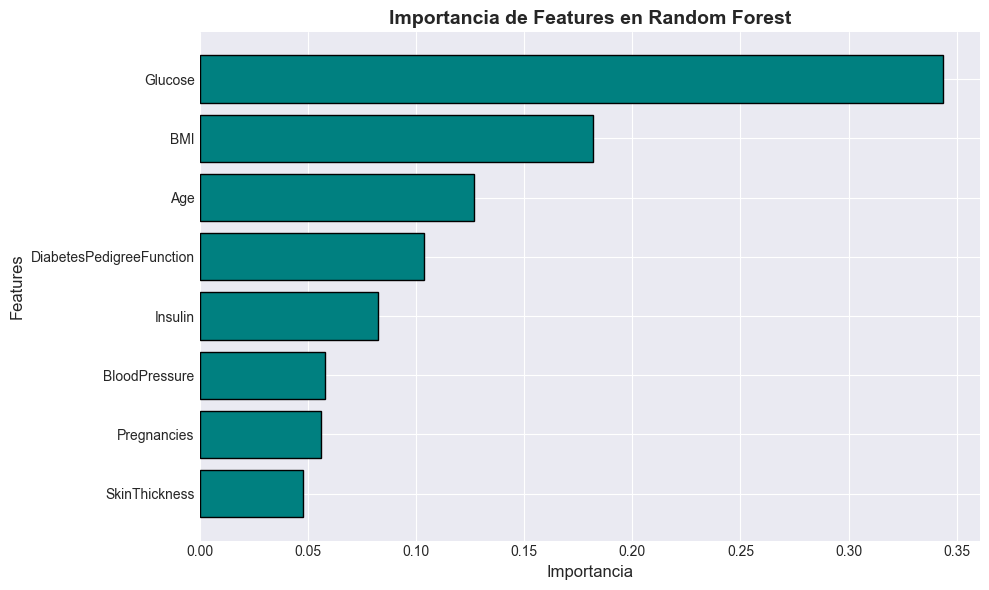

In [54]:
# Gráfica de importancia
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='teal', edgecolor='black')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Importancia de Features en Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [55]:
print("\n 9 Visualización de Árbol de Decisión Individual")

# Extraer un arbol
arbol_individual = rf_optimizado.estimators_[0]


 9 Visualización de Árbol de Decisión Individual


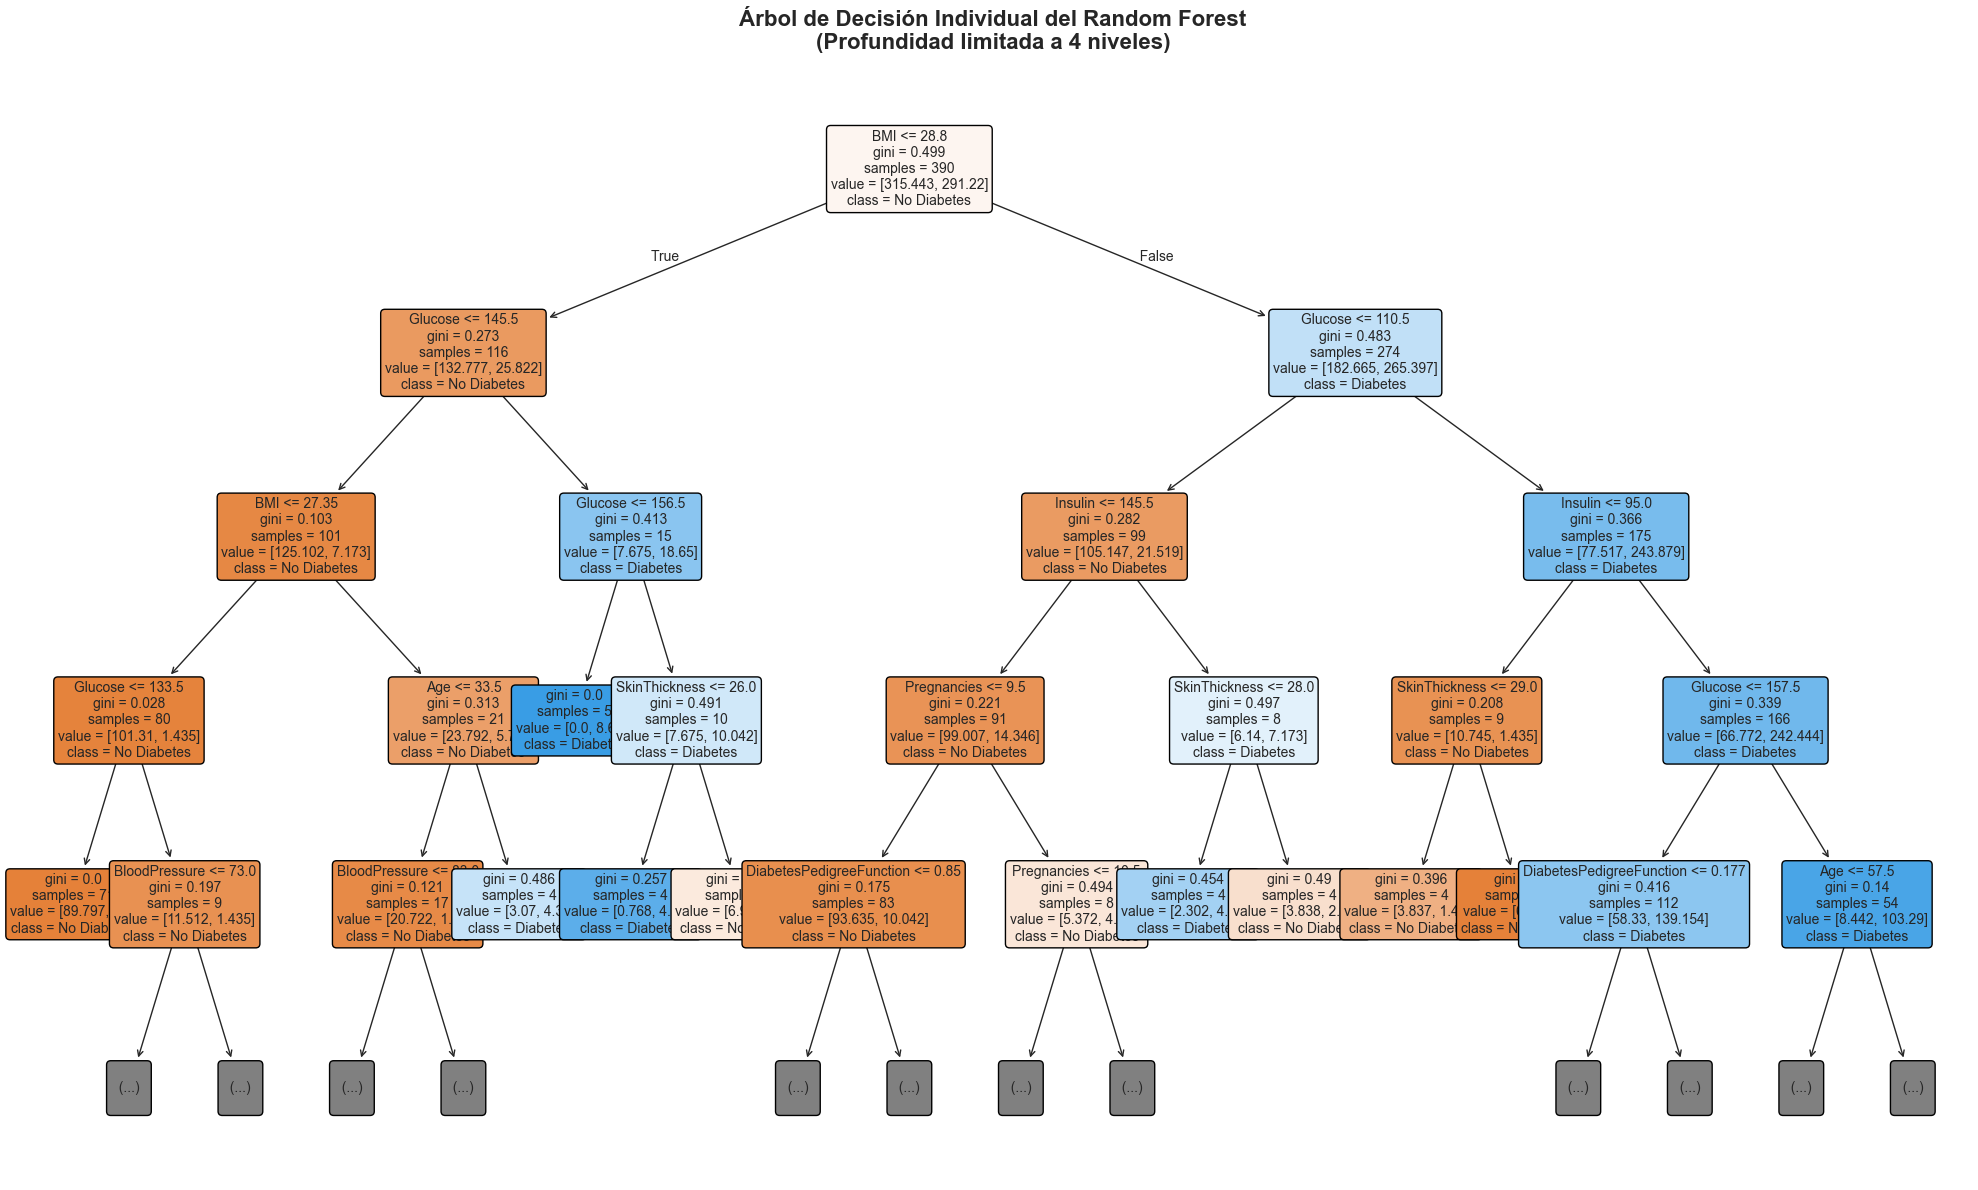

In [56]:
# Visualizar árbol (limitado a 4 niveles)
plt.figure(figsize=(20, 12))
plot_tree(arbol_individual, 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'],
          filled=True, 
          max_depth=4,
          fontsize=10,
          rounded=True)
plt.title('Árbol de Decisión Individual del Random Forest\n(Profundidad limitada a 4 niveles)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


 10 Visualización de Matrices de Confusión


Text(0.5, 1.0, 'Modelo Base\n(Accuracy: 77.92%)')

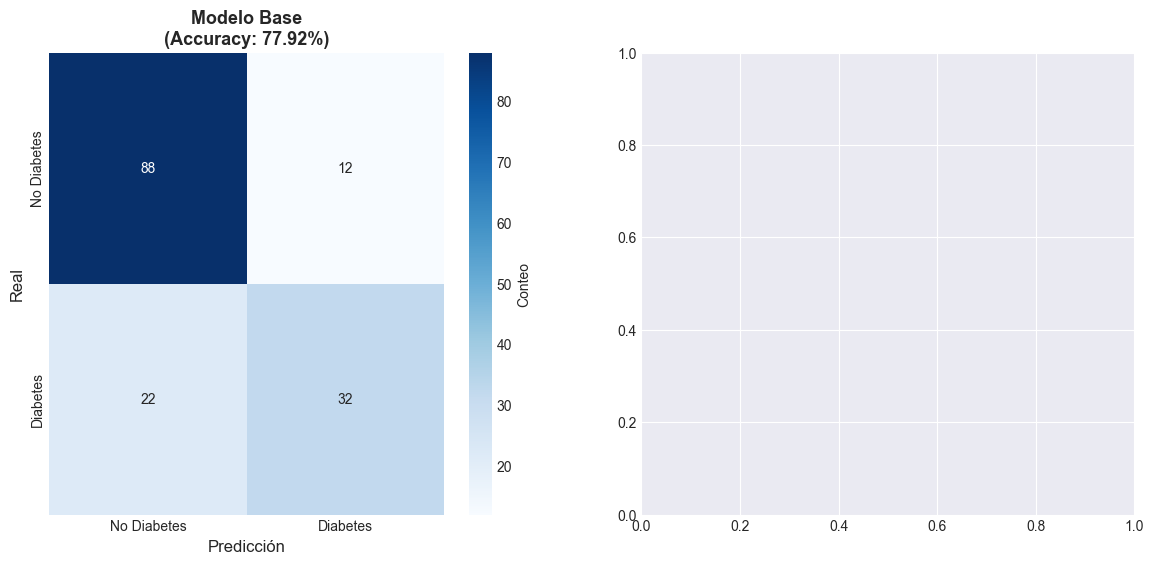

In [57]:
print("\n 10 Visualización de Matrices de Confusión")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz Base
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            ax=axes[0], cbar_kws={'label': 'Conteo'})
axes[0].set_xlabel('Predicción', fontsize=12)
axes[0].set_ylabel('Real', fontsize=12)
axes[0].set_title(f'Modelo Base\n(Accuracy: {accuracy_base:.2%})', 
                 fontsize=13, fontweight='bold')

In [58]:
# Matriz Optimizada
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            ax=axes[1], cbar_kws={'label': 'Conteo'})
axes[1].set_xlabel('Predicción', fontsize=12)
axes[1].set_ylabel('Real', fontsize=12)
axes[1].set_title(f'Modelo Optimizado\n(Accuracy: {accuracy_opt:.2%})', 
                 fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


 11 Curvas ROC


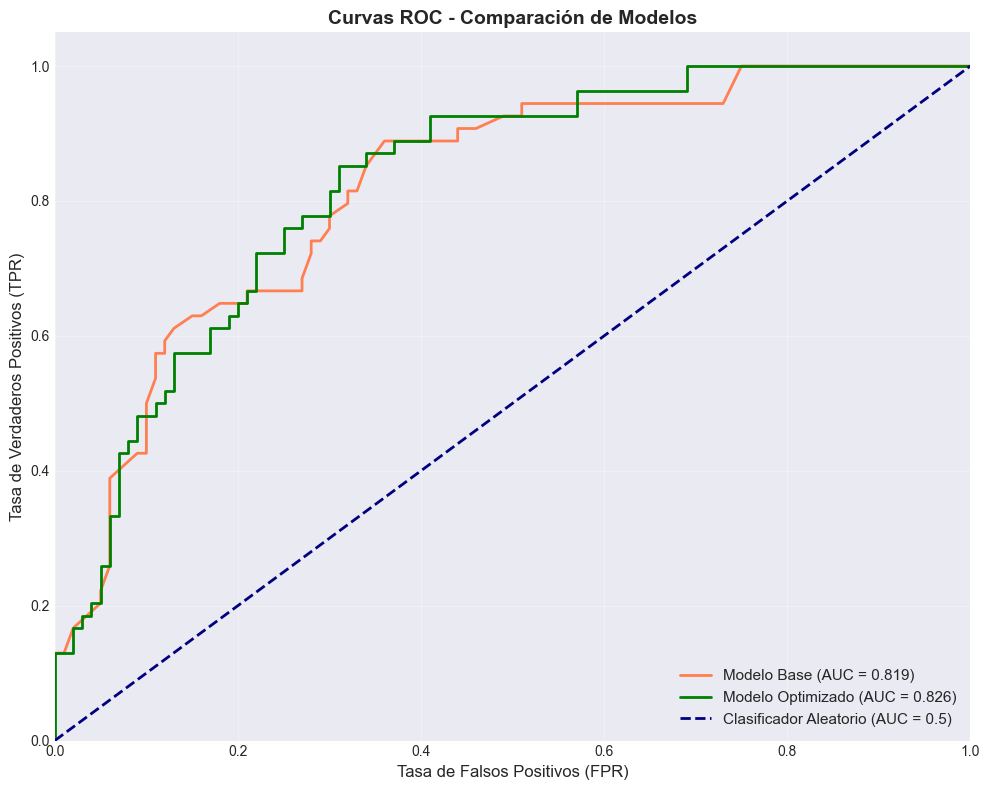

In [59]:
print("\n 11 Curvas ROC")

fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba_base)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_optimizado)

plt.figure(figsize=(10, 8))

plt.plot(fpr_base, tpr_base, color='coral', lw=2, 
         label=f'Modelo Base (AUC = {auc_base:.3f})')
plt.plot(fpr_opt, tpr_opt, color='green', lw=2, 
         label=f'Modelo Optimizado (AUC = {auc_opt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Clasificador Aleatorio (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


12 Comparación visual de métricas


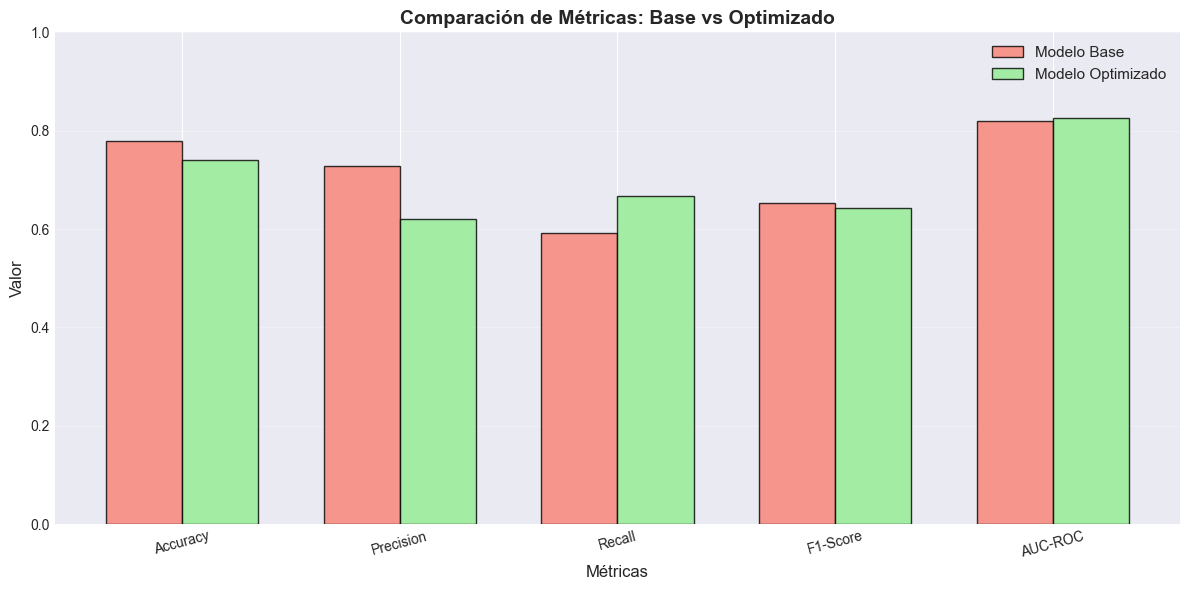

In [60]:
print("\n12 Comparación visual de métricas")

metricas_nombres = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
base_values = [accuracy_base, precision_base, recall_base, f1_base, auc_base]
opt_values = [accuracy_opt, precision_opt, recall_opt, f1_opt, auc_opt]

x = np.arange(len(metricas_nombres))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, base_values, width, label='Modelo Base', 
        color='salmon', edgecolor='black', alpha=0.8)
plt.bar(x + width/2, opt_values, width, label='Modelo Optimizado', 
        color='lightgreen', edgecolor='black', alpha=0.8)

plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Comparación de Métricas: Base vs Optimizado', fontsize=14, fontweight='bold')
plt.xticks(x, metricas_nombres, rotation=15)
plt.ylim([0, 1])
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [61]:
print("\n 13 Guardando modelo para repositorio")

import joblib


 13 Guardando modelo para repositorio


In [63]:
# 15. RESUMEN FINAL

print("\n" + "=" * 60)
print("RESUMEN FINAL")

print(f"""
 MODELO IMPLEMENTADO: Random Forest Classifier

 RESULTADOS FINALES:
   • Accuracy:  {accuracy_opt:.4f} ({accuracy_opt*100:.2f}% de predicciones correctas)
   • Precision: {precision_opt:.4f} (De los predichos como diabetes, {precision_opt*100:.1f}% son correctos)
   • Recall:    {recall_opt:.4f} (Detecta {recall_opt*100:.1f}% de los casos de diabetes)
   • F1-Score:  {f1_opt:.4f} (Balance entre precisión y recall)
   • AUC-ROC:   {auc_opt:.4f} (Capacidad de discriminación)
   
 MEJORA OBTENIDA:
   • Accuracy mejoró: {((accuracy_opt - accuracy_base) / accuracy_base * 100):.2f}%
   • F1-Score mejoró: {((f1_opt - f1_base) / f1_base * 100):.2f}%
   • AUC-ROC mejoró:  {((auc_opt - auc_base) / auc_base * 100):.2f}%
   
 TOP 3 FEATURES MÁS IMPORTANTES:
""")

for idx, row in feature_importance.head(3).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

print(f"""
 INTERPRETACIÓN CLÍNICA:
   • Verdaderos Positivos:  {cm_opt[1,1]} (Diabetes correctamente detectada)
   • Falsos Negativos:      {cm_opt[1,0]} (Diabetes no detectada - RIESGO)
   • Verdaderos Negativos:  {cm_opt[0,0]} (No diabetes correctamente identificada)
   • Falsos Positivos:      {cm_opt[0,1]} (Falsa alarma de diabetes)
   
 CONCLUSIÓN:
   El modelo Random Forest optimizado puede predecir diabetes con {accuracy_opt*100:.1f}% 
   de exactitud, identificando correctamente {recall_opt*100:.1f}% de los casos positivos.
   Los factores más importantes son: {feature_importance.iloc[0]['Feature']}, 
   {feature_importance.iloc[1]['Feature']}, y {feature_importance.iloc[2]['Feature']}.
""")

print(" ANÁLISIS COMPLETADO EXITOSAMENTE")


RESUMEN FINAL

 MODELO IMPLEMENTADO: Random Forest Classifier

 RESULTADOS FINALES:
   • Accuracy:  0.7403 (74.03% de predicciones correctas)
   • Precision: 0.6207 (De los predichos como diabetes, 62.1% son correctos)
   • Recall:    0.6667 (Detecta 66.7% de los casos de diabetes)
   • F1-Score:  0.6429 (Balance entre precisión y recall)
   • AUC-ROC:   0.8265 (Capacidad de discriminación)

 MEJORA OBTENIDA:
   • Accuracy mejoró: -5.00%
   • F1-Score mejoró: -1.56%
   • AUC-ROC mejoró:  0.89%

 TOP 3 FEATURES MÁS IMPORTANTES:

   2. Glucose: 0.3435
   6. BMI: 0.1820
   8. Age: 0.1266

 INTERPRETACIÓN CLÍNICA:
   • Verdaderos Positivos:  36 (Diabetes correctamente detectada)
   • Falsos Negativos:      18 (Diabetes no detectada - RIESGO)
   • Verdaderos Negativos:  78 (No diabetes correctamente identificada)
   • Falsos Positivos:      22 (Falsa alarma de diabetes)

ARCHIVO PARA REPOSITORIO:
   • modelo_clasificacion_diabetes.pkl ← Subir al repositorio

 CONCLUSIÓN:
   El modelo Rando